In [1]:
import torch
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from gtda.graphs import KNeighborsGraph
import itertools
from utils import GraphRNN_dataset, GraphRNN_DataSampler
import random

from importlib import reload
import matplotlib.pyplot as plt

from preprocessor import Preprocessor
from preprocessor import draw_network
from preprocessor import get_adj_from_plot

from preprocessor_final_data import Preprocessor
from preprocessor_final_data import draw_network
from preprocessor_final_data import get_adj_from_plot

print("Gathering data...")
flow_dataset = "../data/daily_county2county_2019_01_01.csv"
epi_dataset = "../data_epi/epidemiology.csv"
epi_dates = ["2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
             "2020-06-13", "2020-06-14", "2020-06-15", "2020-06-16",
             "2020-06-17", "2020-06-18", "2020-06-19", "2020-06-20",
             "2020-06-21", "2020-06-22", "2020-06-23", "2020-06-24",
                "2020-06-25", "2020-06-26", "2020-06-27", "2020-06-28",
                "2020-06-29", "2020-06-30", "2020-07-01", "2020-07-02",
                "2020-07-03", "2020-07-04", "2020-07-05", "2020-07-06",
                "2020-07-07", "2020-07-08", "2020-07-09", "2020-07-10",
                "2020-07-11", "2020-07-12", "2020-07-13", "2020-07-14",
                "2020-07-15", "2020-07-16", "2020-07-17", "2020-07-18",
                "2020-07-19", "2020-07-20", "2020-07-21", "2020-07-22",
                "2020-07-23", "2020-07-24", "2020-07-25", "2020-07-26",
                "2020-07-27", "2020-07-28", "2020-07-29", "2020-07-30"
             ]

epi_dates_medium = [
    "2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
    "2020-06-13", "2020-06-14", "2020-06-15", "2020-06-16",
    "2020-06-17", "2020-06-18", "2020-06-19", "2020-06-20",
    "2020-06-21", "2020-06-22", "2020-06-23", "2020-06-24",
    "2020-06-25", "2020-06-26", "2020-06-27", "2020-06-28",
    "2020-06-29", "2020-06-30", "2020-07-01", "2020-07-02",
    "2020-07-03", "2020-07-04", "2020-07-05", "2020-07-06",
    "2020-07-07", "2020-07-08", "2020-07-09", "2020-07-10",
    "2020-07-11", "2020-07-12", "2020-07-13", "2020-07-14",
    "2020-07-15", "2020-07-16", "2020-07-17", "2020-07-18",
    "2020-07-19", "2020-07-20", "2020-07-21", "2020-07-22",
    "2020-07-23", "2020-07-24", "2020-07-25", "2020-07-26",
    "2020-07-27", "2020-07-28", "2020-07-29", "2020-07-30",
    "2020-07-31", "2020-08-01", "2020-08-02", "2020-08-03",
    "2020-08-04", "2020-08-05", "2020-08-06", "2020-08-07",
    "2020-08-08", "2020-08-09", "2020-08-10", "2020-08-11",
    "2020-08-12", "2020-08-13", "2020-08-14", "2020-08-15",
    "2020-08-16", "2020-08-17", "2020-08-18", "2020-08-19",
    "2020-08-20", "2020-08-21", "2020-08-22", "2020-08-23",
    "2020-08-24", "2020-08-25", "2020-08-26", "2020-08-27",
    "2020-08-28", "2020-08-29", "2020-08-30", "2020-08-31",
    "2020-09-01", "2020-09-02", "2020-09-03", "2020-09-04",
    "2020-09-05", "2020-09-06", "2020-09-07", "2020-09-08",
    "2020-09-09", "2020-09-10", "2020-09-11", "2020-09-12",
    "2020-09-13", "2020-09-14", "2020-09-15", "2020-09-16",
    "2020-09-17", "2020-09-18", "2020-09-19", "2020-09-20",
    "2020-09-21", "2020-09-22", "2020-09-23", "2020-09-24",
    "2020-09-25", "2020-09-26", "2020-09-27", "2020-09-28",
    "2020-09-29", "2020-09-30"
]

epi_dates_large = [
    "2020-06-01", "2020-06-02", "2020-06-03", "2020-06-04", 
    "2020-06-05", "2020-06-06", "2020-06-07", "2020-06-08",
    "2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
    "2020-06-13", "2020-06-14", "2020-06-15", "2020-06-16",
    "2020-06-17", "2020-06-18", "2020-06-19", "2020-06-20",
    "2020-06-21", "2020-06-22", "2020-06-23", "2020-06-24",
    "2020-06-25", "2020-06-26", "2020-06-27", "2020-06-28",
    "2020-06-29", "2020-06-30", "2020-07-01", "2020-07-02",
    "2020-07-03", "2020-07-04", "2020-07-05", "2020-07-06",
    "2020-07-07", "2020-07-08", "2020-07-09", "2020-07-10",
    "2020-07-11", "2020-07-12", "2020-07-13", "2020-07-14",
    "2020-07-15", "2020-07-16", "2020-07-17", "2020-07-18",
    "2020-07-19", "2020-07-20", "2020-07-21", "2020-07-22",
    "2020-07-23", "2020-07-24", "2020-07-25", "2020-07-26",
    "2020-07-27", "2020-07-28", "2020-07-29", "2020-07-30",
    "2020-07-31", "2020-08-01", "2020-08-02", "2020-08-03",
    "2020-08-04", "2020-08-05", "2020-08-06", "2020-08-07",
    "2020-08-08", "2020-08-09", "2020-08-10", "2020-08-11",
    "2020-08-12", "2020-08-13", "2020-08-14", "2020-08-15",
    "2020-08-16", "2020-08-17", "2020-08-18", "2020-08-19",
    "2020-08-20", "2020-08-21", "2020-08-22", "2020-08-23",
    "2020-08-24", "2020-08-25", "2020-08-26", "2020-08-27",
    "2020-08-28", "2020-08-29", "2020-08-30", "2020-08-31",
    "2020-09-01", "2020-09-02", "2020-09-03", "2020-09-04",
    "2020-09-05", "2020-09-06", "2020-09-07", "2020-09-08",
    "2020-09-09", "2020-09-10", "2020-09-11", "2020-09-12",
    "2020-09-13", "2020-09-14", "2020-09-15", "2020-09-16",
    "2020-09-17", "2020-09-18", "2020-09-19", "2020-09-20",
    "2020-09-21", "2020-09-22", "2020-09-23", "2020-09-24",
    "2020-09-25", "2020-09-26", "2020-09-27", "2020-09-28",
    "2020-09-29", "2020-09-30", "2020-10-01", "2020-10-02",
    "2020-10-03", "2020-10-04", "2020-10-05", "2020-10-06",
    "2020-10-07", "2020-10-08", "2020-10-09", "2020-10-10",
    "2020-10-11", "2020-10-12", "2020-10-13", "2020-10-14",
    "2020-10-15", "2020-10-16", "2020-10-17", "2020-10-18",
    "2020-10-19", "2020-10-20", "2020-10-21", "2020-10-22",
    "2020-10-23", "2020-10-24", "2020-10-25", "2020-10-26",
    "2020-10-27", "2020-10-28", "2020-10-29", "2020-10-30",
    "2020-10-31", "2020-11-01", "2020-11-02", "2020-11-03",
    "2020-11-04", "2020-11-05", "2020-11-06", "2020-11-07",
    "2020-11-08", "2020-11-09", "2020-11-10", "2020-11-11",
    "2020-11-12", "2020-11-13", "2020-11-14", "2020-11-15",
    "2020-11-16", "2020-11-17", "2020-11-18", "2020-11-19",
    "2020-11-20", "2020-11-21", "2020-11-22", "2020-11-23",
    "2020-11-24", "2020-11-25", "2020-11-26", "2020-11-27",
    "2020-11-28", "2020-11-29", "2020-11-30", "2020-12-01",
    "2020-12-02", "2020-12-03", "2020-12-04", "2020-12-05",
    "2020-12-06", "2020-12-07", "2020-12-08", "2020-12-09",
    "2020-12-10", "2020-12-11", "2020-12-12", "2020-12-13",
    "2020-12-14", "2020-12-15", "2020-12-16", "2020-12-17",
    "2020-12-18", "2020-12-19", "2020-12-20", "2020-12-21",
    "2020-12-22", "2020-12-23", "2020-12-24", "2020-12-25",
    "2020-12-26", "2020-12-27", "2020-12-28", "2020-12-29",
    "2020-12-30", "2020-12-31"
]

epi_dates_smaller = ["2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
             "2020-06-13", "2020-06-14", "2020-06-15", "2020-06-16",
             "2020-06-17", "2020-06-18", "2020-06-19", "2020-06-20",
             ]

epi_dates_one_sample = ["2020-06-09", "2020-06-10", "2020-06-11", "2020-06-12",
             "2020-06-13", "2020-06-14", "2020-06-15"] # for testing
epi_dates_pred_one_sample = ["2020-06-16"] # for testing

Gathering data...


In [2]:
# THIS IS WITH THE NEW PREPROCESSOR FILE (PREPROCESSOR_FINAL_DATA.PY)
import preprocessor_final_data 

print("Preprocessing data...")

# Preprocess the data
input_hor = 7   # test now with smaller input horizon
pred_hor = 1    # test now with smaller prediction horizon
train_perc, test_perc = 0.8, 0.2

# Preprocess the data
import os
print(os.getcwd())
locations_data = "../final_data/locations_data_unique.npy"
epi_dataset = "../final_data/X_normalized.npy"
preproc = preprocessor_final_data.Preprocessor(flow_dataset, epi_dataset, locations_data, plottable=True)

graph_kronecker_whole_df = preproc.combined_manual_kronecker() # makes the pandas df from the kronecker data

# check for duplicate values in graph_kronecker_whole_df
print("Number of duplicate values in graph_kronecker_whole_df: ", graph_kronecker_whole_df.duplicated().sum())

# print first dataframe in graph_kronecker_whole_df, check if the data is getting pulled correctly
print("Check: First dataframe in graph_kronecker_whole_df: ", graph_kronecker_whole_df.iloc[0])



Preprocessing data...
/Users/anja/Documents/Documents - Mac/Delft/Q4/GraphsML/final/code_v2/GraphML/ClassicalModels
Number of duplicate values in graph_kronecker_whole_df:  0
Check: First dataframe in graph_kronecker_whole_df:  geoid_o                                      1001
geoid_d                                   1001021
lng_o                                  -86.642757
lat_o                                   32.534921
lng_d                                   63.281186
lat_d                                   32.847853
date                                   2019-01-01
visitor_flows                            0.463154
pop_flows                                0.550704
population1                             -0.017196
population2                              0.021202
weather1                                 -0.36587
weather2                                -0.038436
cumulative_confirmed                     0.013195
cumulative_deceased                      0.208404
new_deceased          

In [3]:
for day in range(29):
    # Do all days need the same number of nodes?
    # count how many entries have geoid_o above 1000000 and below 2000000 assuming the dataframe is sorted by geoid
    count = 0
    list_of_geoids = []
    for i in range(len(graph_kronecker_whole_df)):
        cur = graph_kronecker_whole_df.iloc[i]['geoid_o']
        upper_bound = (day+1)*1000000 # day 0 is 000xxxx day 1 is 100xxxx
        lower_bound = (day)*1000000
        if cur < upper_bound and cur >= lower_bound:
            if cur not in list_of_geoids:
                list_of_geoids.append(cur)
            count += 1
        if (cur > upper_bound+ 1000000):
            break
    print("Number of nodes on day ", day, " is, ", len(list_of_geoids))

# print last dataframe in graph_kronecker_whole_df, check if the data is getting pulled correctly
print("Check: Last dataframe in graph_kronecker_whole_df: ", graph_kronecker_whole_df.iloc[-1])

# print("Drawing the network ...")
# draw_network(graph_kronecker_whole_df)

Number of nodes on day  0  is,  3218
Number of nodes on day  1  is,  3218
Number of nodes on day  2  is,  3218
Number of nodes on day  3  is,  3218
Number of nodes on day  4  is,  3218
Number of nodes on day  5  is,  3218
Number of nodes on day  6  is,  3218
Number of nodes on day  7  is,  3218
Number of nodes on day  8  is,  3218
Number of nodes on day  9  is,  3218
Number of nodes on day  10  is,  3218
Number of nodes on day  11  is,  3218
Number of nodes on day  12  is,  3218
Number of nodes on day  13  is,  3218
Number of nodes on day  14  is,  3218
Number of nodes on day  15  is,  3218
Number of nodes on day  16  is,  3218
Number of nodes on day  17  is,  3218
Number of nodes on day  18  is,  3218
Number of nodes on day  19  is,  3218
Number of nodes on day  20  is,  3218
Number of nodes on day  21  is,  3218
Number of nodes on day  22  is,  3218
Number of nodes on day  23  is,  3218
Number of nodes on day  24  is,  3218
Number of nodes on day  25  is,  3218
Number of nodes on day

In [4]:
from preprocessor_final_data import get_adj_from_plot
from preprocessor_final_data import draw_network
import math

num_nodes_per_day = len(list_of_geoids)

print("Getting the adjacency matrix..")
adj_kronecker_whole = get_adj_from_plot(graph_kronecker_whole_df)

print("Number nodes per day: " , num_nodes_per_day)

# Check that the dimensions of the adj are correct
print("Check: Dimsensions of adj: ", adj_kronecker_whole.shape)
print("Check: the number of days is: ", adj_kronecker_whole.shape[0]/(num_nodes_per_day))
print("(ERROR) Check: Shape of adj % num nodes per day, should be 0: ", adj_kronecker_whole.shape[0] % (num_nodes_per_day))

Getting the adjacency matrix..
Number nodes per day:  3218
Check: Dimsensions of adj:  (96598, 96598)
Check: the number of days is:  30.01802361715351
(ERROR) Check: Shape of adj % num nodes per day, should be 0:  58


In [5]:
# NEWER VERSION

print("Getting the training graph signal...")
# do it first only with cumulative_confirmed
tr_epi = preproc.set_timestep_offset_epi_dataset(from_timestep=0).get_epi_dataset() # will get the epi info for the entire dataset, the entire kronecker, then later we index per training example and pred
print(len(tr_epi)) # working, should be 30
print(tr_epi[0]) # working, should be the geoids of the first day

train_graph_sig = {}
for day in tr_epi:
    entry_count = 0
    for geoid in day.geoid_o:
        if geoid not in train_graph_sig: # which should be for every day
            train_graph_sig[geoid] = {
                'weather1': [],
                'weather2': [],
                'cumulative_confirmed': [],
                'cumulative_deceased': [],
                'new_deceased': [],
                'cumulative_persons_fully_vaccinated': [],
                'new_persons_fully_vaccinated': []
            }

        train_graph_sig[geoid]['weather1'].append(day.weather1[entry_count])
        train_graph_sig[geoid]['weather2'].append(day.weather2[entry_count])
        train_graph_sig[geoid]['cumulative_confirmed'].append(day.cumulative_confirmed[entry_count])
        train_graph_sig[geoid]['cumulative_deceased'].append(day.cumulative_deceased[entry_count])
        train_graph_sig[geoid]['new_deceased'].append(day.new_deceased[entry_count])
        train_graph_sig[geoid]['cumulative_persons_fully_vaccinated'].append(day.cumulative_persons_fully_vaccinated[entry_count])
        train_graph_sig[geoid]['new_persons_fully_vaccinated'].append(day.new_persons_fully_vaccinated[entry_count])
        entry_count += 1
print("Check: Should be number of nodes per day * number of days", len(train_graph_sig))  # working

# sort train_graph_sig by geoid_o
train_graph_sig = dict(sorted(train_graph_sig.items(), key=lambda item: item[0]))

# print the first element of train_graph_sig, check if the data is getting pulled correctly
print("Check: First element in train_graph_sig: ", {k: train_graph_sig[k] for k in list(train_graph_sig)[:1]})




Getting the training graph signal...
30
      population1  population2  weather1  weather2  cumulative_confirmed  \
0        0.120058    -0.292138 -0.023024 -0.165862              0.003047   
1       -0.038940    -0.032969  0.133645 -0.239483              0.002658   
2        0.083130    -0.007034 -0.546401 -0.034609              0.033513   
3       -0.014919    -0.057468 -0.429085 -0.035618              0.005976   
4        0.020884    -0.150796 -0.612470 -0.014834              0.005770   
...           ...          ...       ...       ...                   ...   
3213     0.040551    -0.159024 -0.065281 -0.073178              0.003134   
3214     0.040726    -0.092382  0.007163  0.130434              0.010932   
3215    -0.054531    -0.030903  0.048266  0.103544              0.000606   
3216     0.087114    -0.219320 -0.106239  0.038681              0.005153   
3217    -0.012397    -0.088579  0.041909  0.117026              0.001782   

      cumulative_deceased  new_deceased  cumula

In [6]:
# NEW CODE 

# Combine all values for each feature across all geo_ids
weather1_values = []
weather2_values = []
cumulative_confirmed_values = []
cumulative_deceased_values = []
new_deceased_values = []
cumulative_persons_fully_vaccinated_values = []
new_persons_fully_vaccinated_values = []

for geoid in train_graph_sig:
    weather1_values.extend(train_graph_sig[geoid]['weather1'])
    weather2_values.extend(train_graph_sig[geoid]['weather2'])
    cumulative_confirmed_values.extend(train_graph_sig[geoid]['cumulative_confirmed'])
    cumulative_deceased_values.extend(train_graph_sig[geoid]['cumulative_deceased'])
    new_deceased_values.extend(train_graph_sig[geoid]['new_deceased'])
    cumulative_persons_fully_vaccinated_values.extend(train_graph_sig[geoid]['cumulative_persons_fully_vaccinated'])
    new_persons_fully_vaccinated_values.extend(train_graph_sig[geoid]['new_persons_fully_vaccinated'])

# Calculate mean and std for each feature across all geo_ids
mean_weather1 = np.mean(weather1_values)
std_weather1 = np.std(weather1_values)

mean_weather2 = np.mean(weather2_values)
std_weather2 = np.std(weather2_values)

mean_cumulative_confirmed = np.mean(cumulative_confirmed_values)
std_cumulative_confirmed = np.std(cumulative_confirmed_values)

mean_cumulative_deceased = np.mean(cumulative_deceased_values)
std_cumulative_deceased = np.std(cumulative_deceased_values)

mean_new_deceased = np.mean(new_deceased_values)
std_new_deceased = np.std(new_deceased_values)

mean_cumulative_persons_fully_vaccinated = np.mean(cumulative_persons_fully_vaccinated_values)
std_cumulative_persons_fully_vaccinated = np.std(cumulative_persons_fully_vaccinated_values)

mean_new_persons_fully_vaccinated = np.mean(new_persons_fully_vaccinated_values)
std_new_persons_fully_vaccinated = np.std(new_persons_fully_vaccinated_values)

# Normalize each feature list in train_graph_sig across all geo_ids
for geoid in train_graph_sig:
    train_graph_sig[geoid]['weather1'] = (train_graph_sig[geoid]['weather1'] - mean_weather1) / std_weather1 if std_weather1 != 0 else 0
    train_graph_sig[geoid]['weather2'] = (train_graph_sig[geoid]['weather2'] - mean_weather2) / std_weather2 if std_weather2 != 0 else 0
    train_graph_sig[geoid]['cumulative_confirmed'] = (train_graph_sig[geoid]['cumulative_confirmed'] - mean_cumulative_confirmed) / std_cumulative_confirmed if std_cumulative_confirmed != 0 else 0
    train_graph_sig[geoid]['cumulative_deceased'] = (train_graph_sig[geoid]['cumulative_deceased'] - mean_cumulative_deceased) / std_cumulative_deceased if std_cumulative_deceased != 0 else 0
    train_graph_sig[geoid]['new_deceased'] = (train_graph_sig[geoid]['new_deceased'] - mean_new_deceased) / std_new_deceased if std_new_deceased != 0 else 0
    train_graph_sig[geoid]['cumulative_persons_fully_vaccinated'] = (train_graph_sig[geoid]['cumulative_persons_fully_vaccinated'] - mean_cumulative_persons_fully_vaccinated) / std_cumulative_persons_fully_vaccinated if std_cumulative_persons_fully_vaccinated != 0 else 0
    train_graph_sig[geoid]['new_persons_fully_vaccinated'] = (train_graph_sig[geoid]['new_persons_fully_vaccinated'] - mean_new_persons_fully_vaccinated) / std_new_persons_fully_vaccinated if std_new_persons_fully_vaccinated != 0 else 0

# print the first element of train_graph_sig, check if the data is getting pulled correctly
print("Check: First element in train_graph_sig: ", {k: train_graph_sig[k] for k in list(train_graph_sig)[:1]})

Check: First element in train_graph_sig:  {1001: {'weather1': array([-1.51613006]), 'weather2': array([-0.32072908]), 'cumulative_confirmed': array([-0.04992888]), 'cumulative_deceased': array([-0.04400005]), 'new_deceased': array([-0.08175677]), 'cumulative_persons_fully_vaccinated': array([-0.0046846]), 'new_persons_fully_vaccinated': array([-0.02080383])}}


In [7]:
# NEWER VERSION

#TODO
unique_geoids = set()
# figure out how many edges in one day
# iterate through graph_kronecker_whole_df and count the number of entries until the geoid_o goes above 1000000
# then break
edge_count = 0
for i in range(len(graph_kronecker_whole_df)):
    # assuming there are no duplicates in the dataframe
    if graph_kronecker_whole_df.loc[i, 'geoid_o'] < 1000000:
        edge_count += 1
    if graph_kronecker_whole_df.loc[i, 'geoid_o'] > 1000000:
        break
        
print("Number of edges in a single day (should be 14329): ", edge_count)

print("Number of items in total in the graph_kronecker_whole_df: ", len(graph_kronecker_whole_df))

print("Number of edges per day", len(graph_kronecker_whole_df)/29) # to check that the df is not missing or duplicating

Number of edges in a single day (should be 14329):  15234
Number of items in total in the graph_kronecker_whole_df:  441786
Number of edges per day 15234.0


In [8]:
all_training_examples = []

for example_num in range(0, len(tr_epi) - (input_hor)): # this is how many times you can "shift and have valid data to pull from"
    # now draw out the adjacency matrix per example
    width_of_adj_per_example = num_nodes_per_day*input_hor
    shift = num_nodes_per_day # number of nodes per day

    # this should still work in the new approach
    adj_per_example = adj_kronecker_whole[ (example_num*shift) : (example_num*shift) + width_of_adj_per_example,
                                           (example_num*shift) : (example_num*shift) + width_of_adj_per_example]

    # now drawing out the train_graph_signal per example

    # get the graph signal corresponding to the example nodes
    train_graph_sig_per_example = {k: train_graph_sig[k] for k in list(train_graph_sig)[(example_num*shift) : (example_num*shift) + width_of_adj_per_example]}

    # get the graph signal corresponding to the [input_hor : input_hor+pred_hor] set of nodes -- NEEDS CHECKING
    train_graph_sig_per_example_pred = {k: train_graph_sig[k] for k in list(train_graph_sig)[(example_num*shift) + num_nodes_per_day*input_hor : (example_num*shift) + num_nodes_per_day*(input_hor+pred_hor)]}

    training_example = [adj_per_example, train_graph_sig_per_example, train_graph_sig_per_example_pred]
    all_training_examples.append(training_example)

# take the last 20% of the the training examples and use them as test examples
all_test_examples = all_training_examples[int(len(all_training_examples)*train_perc):]
# remove those examples from all_training_examples
all_training_examples = all_training_examples[:int(len(all_training_examples)*train_perc)]

print("Check: Last example in train_graph_sig_per_example: ", {k: train_graph_sig_per_example[k] for k in list(train_graph_sig_per_example)[-1:]})
print("Check: Last example in train_graph_sig_pred: ", {k: train_graph_sig_per_example_pred[k] for k in list(train_graph_sig_per_example_pred)[-1:]}) # working!


print("Number of training examples: ", len(all_training_examples))
print("Number of test examples: ", len(all_test_examples))

# Check a single training example
print("Check: Single training example: ")
# print("Adjacency matrix: ", all_training_examples[0][0])
print("Dimensions of adjacency matrix in a single training example: ", all_training_examples[0][0].shape)
print("Train graph signal in a single training example: : ", all_training_examples[0][1])
print("Dimensions of train graph signal in a single training example: : ", len(all_training_examples[0][1]))
print("Train graph signal prediction in a single training example: : ", all_training_examples[0][2])
print("Dimensions of train graph signal prediction in a single training example: : ", len(all_training_examples[0][2]))


Check: Last example in train_graph_sig_per_example:  {28072153: {'weather1': array([3.48977949]), 'weather2': array([-1.89724265]), 'cumulative_confirmed': array([-0.26207538]), 'cumulative_deceased': array([-0.30299855]), 'new_deceased': array([-0.19361051]), 'cumulative_persons_fully_vaccinated': array([-0.20210187]), 'new_persons_fully_vaccinated': array([-0.04327468])}}
Check: Last example in train_graph_sig_pred:  {29072153: {'weather1': array([3.52816408]), 'weather2': array([-2.07938867]), 'cumulative_confirmed': array([-0.26137314]), 'cumulative_deceased': array([-0.26849513]), 'new_deceased': array([-0.19347341]), 'cumulative_persons_fully_vaccinated': array([-0.20202016]), 'new_persons_fully_vaccinated': array([-0.11368096])}}
Number of training examples:  18
Number of test examples:  5
Check: Single training example: 
Dimensions of adjacency matrix in a single training example:  (22526, 22526)
Train graph signal in a single training example: :  {1001: {'weather1': array([-1.

In [9]:
# THIS IS WITH THE ORIG PREPROCESSOR FILE

import preprocessor

print("Preprocessing data...")

# Use this for training to choose what size of data you want to use
cur_epi_dates = epi_dates_smaller # only does this up until the last date
# cur_epi_dates = epi_dates 
# cur_epi_dates = epi_dates_medium
# cur_epi_dates = epi_dates_large 

# Preprocess the data
input_hor = 7   # test now with smaller input horizon
pred_hor = 1    # test now with smaller prediction horizon
train_perc, test_perc = 0.8, 0.2

print("Building the kronecker graph...")
preprocessor = preprocessor.Preprocessor(flow_dataset, epi_dataset, cur_epi_dates, plottable=True) # test first with epi dates smaller
graph_kronecker_whole_df = preprocessor.combined_manual_kronecker() # makes the pandas df from the kronecker data

# if the first date is not equal to the first date in the epi_dates, then raise an error
if graph_kronecker_whole_df["date_y"][0] != cur_epi_dates[0]:
   raise ValueError("ERROR: The first date in the pandas dataframe is not equal to the first date in the cur_epi_dates")

# if the last date is not equal to the last date in the epi_dates, then raise an error
if graph_kronecker_whole_df["date_y"].iloc[-1] != cur_epi_dates[-2]:
   raise ValueError("ERROR: The last date in the pandas dataframe is not equal to the last date in the cur_epi_dates")

# print last dataframe in graph_kronecker_whole_df, check if the data is getting pulled correctly
print("Check: Last dataframe in graph_kronecker_whole_df: ", graph_kronecker_whole_df.iloc[-1])

# print("Drawing the network ...")
# draw_network(graph_kronecker_whole_df)

Preprocessing data...
Building the kronecker graph...


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 0: invalid start byte

In [410]:
# OLD VERSION using preprocessor.py

print("Getting the adjacency matrix..")
adj_kronecker_whole = get_adj_from_plot(graph_kronecker_whole_df)




print("Getting the training graph signal...")
tr_epi = preprocessor.set_timestep_offset_epi_dataset(from_timestep=0).get_epi_dataset() # will get the epi info for the entire dataset, the entire kronecker, then later we index per training example and pred
print("LEN TR EPI", len(tr_epi))
train_graph_sig = {}
for data in tr_epi:
    train_graph_sig = {**train_graph_sig, **dict(zip(data.geoid_o, data.new_confirmed))}

print("LEN TR GR SIG", len(train_graph_sig))

# sort train_graph_sig by geoid_o
train_graph_sig = dict(sorted(train_graph_sig.items(), key=lambda item: item[0]))

# check if any of the values in the dictionary are Nan, if yes, print and replace with 0.0
for key, value in train_graph_sig.items():
    if np.isnan(value):
        print("Nan value found in train_graph_sig: ", key, value, ". Replacing with 0.0 ...")
        # replace NaN with 0.0
        train_graph_sig[key] = 0.0

# Normalize all graph signals that you have by subtracting by the mean and dividing by the standard deviation
# train_graph_sig = {k: (v - np.mean(list(train_graph_sig.values())))/np.std(list(train_graph_sig.values())) for k, v in train_graph_sig.items()} # this takes a very long time, see if more efficient way

# MORE EFFICIENT WAY
values = list(train_graph_sig.values())
mean = np.mean(values)
std = np.std(values)
train_graph_sig = {k: (v - mean) / std for k, v in train_graph_sig.items()}

# what are the last 10 elements in train_graph_sig? Is all the data gettting pulled?
print("Check: Last 10 elements in train_graph_sig: ", {k: train_graph_sig[k] for k in list(train_graph_sig)[-10:]}) # yes the data is getting pulled here

# check if train_graph_sig being pulled correctly
print("Check: Size of train_graph_sig: ", len(train_graph_sig)) 

# check if the last few elements in train_graph_sig are being pulled correctly 
print("Check: First few from train_graph_sig: ", {k: train_graph_sig[k] for k in list(train_graph_sig)[:5]})

# how many nodes are in the train_graph_sig across the whole kronecker? This is a check
print("Check: Number of nodes in the train_graph_sig: ", len(train_graph_sig))

# check the mean and standard deviation of all the signals in train_graph_sig
print("Check: Mean of all signals in train_graph_sig: ", np.mean(list(train_graph_sig.values())))
print("Check: Standard deviation of all signals in train_graph_sig: ", np.std(list(train_graph_sig.values())))



# for the first 14329 edges, collect the unique geoid_o and geoid_d in one set
unique_geoids = set()

# TODO: remove this hardcoding on the number of edges if possible
for i in range(14329):
    geoid_o = graph_kronecker_whole_df.loc[i, 'geoid_o']
    unique_geoids.add(geoid_o)

print("Number of unique geoids: ", len(unique_geoids))


if len(train_graph_sig) != len(cur_epi_dates)*len(unique_geoids):
    raise ValueError("The number of nodes in train_graph_sig is not equal to len(cur_epi_dates)*len(unique_geoids)")


all_training_examples = []

for example_num in range(0, len(cur_epi_dates) - (input_hor)): # this is how many times you can "shift and have valid data to pull from"
    print()
    print("Example number: ", example_num)
    # now draw out the adjacency matrix per example
    width_of_adj_per_example = len(unique_geoids)*input_hor
    shift = len(unique_geoids) # number of nodes per day
    adj_per_example = adj_kronecker_whole[ (example_num*shift) : (example_num*shift) + width_of_adj_per_example,
                                           (example_num*shift) : (example_num*shift) + width_of_adj_per_example]

    # now drawing out the train_graph_signal per example

    # get the graph signal corresponding to the example nodes
    train_graph_sig_per_example = {k: train_graph_sig[k] for k in list(train_graph_sig)[(example_num*shift) : (example_num*shift) + width_of_adj_per_example]}

    print("Check: Last few examples in train_graph_sig_per_example: ", {k: train_graph_sig_per_example[k] for k in list(train_graph_sig_per_example)[-5:]})

    # get the graph signal corresponding to the [input_hor : input_hor+pred_hor] set of nodes -- NEEDS CHECKING
    train_graph_sig_per_example_pred = {k: train_graph_sig[k] for k in list(train_graph_sig)[(example_num*shift) + len(unique_geoids)*input_hor : (example_num*shift) + len(unique_geoids)*(input_hor+pred_hor)]}

    print("Check: Last few examples in train_graph_sig_pred: ", {k: train_graph_sig_per_example_pred[k] for k in list(train_graph_sig_per_example_pred)[-5:]}) # working!

    training_example = [adj_per_example, train_graph_sig_per_example, train_graph_sig_per_example_pred]
    all_training_examples.append(training_example)

# take the last 20% of the the training examples and use them as test examples
all_test_examples = all_training_examples[int(len(all_training_examples)*train_perc):]
# remove those examples from all_training_examples
all_training_examples = all_training_examples[:int(len(all_training_examples)*train_perc)]

print("Number of training examples: ", len(all_training_examples))
print("Number of test examples: ", len(all_test_examples))


Getting the adjacency matrix..
Getting the training graph signal...
0
1
2
3
4
5
6
7
8
9
10
11
LEN TR EPI 12
LEN TR GR SIG 36840
Nan value found in train_graph_sig:  2013 nan . Replacing with 0.0 ...
Nan value found in train_graph_sig:  2100 nan . Replacing with 0.0 ...
Nan value found in train_graph_sig:  31007 nan . Replacing with 0.0 ...
Nan value found in train_graph_sig:  38043 nan . Replacing with 0.0 ...
Nan value found in train_graph_sig:  48425 nan . Replacing with 0.0 ...
Check: Last 10 elements in train_graph_sig:  {11072135: -0.04166806722170899, 11072137: -0.12911920000041147, 11072139: 0.002057499167642247, 11072141: -0.15098198319508707, 11072143: -0.08539363361106023, 11072145: -0.06353085041638461, 11072147: -0.17284476638976268, 11072149: -0.15098198319508707, 11072151: -0.15098198319508707, 11072153: -0.12911920000041147}
Check: Size of train_graph_sig:  36840
Check: First few from train_graph_sig:  {1001: 0.045783065556993484, 1003: -0.06353085041638461, 1005: -0.129

ValueError: The number of nodes in train_graph_sig is not equal to len(cur_epi_dates)*len(unique_geoids)

In [10]:
# store the training_data and testing_data in a pickle file
import pickle
with open("training_data.pkl", "wb") as f:
   pickle.dump(all_training_examples, f)

with open("testing_data.pkl", "wb") as f:
   pickle.dump(all_test_examples, f)

In [11]:
# load the pickle files
import pickle
with open("training_data.pkl", "rb") as f:
   training_data = pickle.load(f)

with open("testing_data.pkl", "rb") as f:
    testing_data = pickle.load(f)


In [12]:
from torch_geometric.nn import GCNConv

In [195]:
# make a custom subclass of Dataset (pytorch class), to the initialization of that class, feed in the traiing_data and testing_data
# inside initialization of the dataset class
# then call the method, get(), if you want to load a sample, what will it return
# at some point the data objects that you have, use the get(index), index = a single training sample (input kronecker graph, output prediction graph signal)
# then create dataloader, give it object of your dataset class 
# for data in dataloader ... loops through the data objects that you have

In [13]:
import math
def get_parameters(desired_params):
    mlp_params = round_up_to_nearest_hundred(desired_params*(2/3))
    gcn_params = round_up_to_nearest_hundred(desired_params*(1/3))

    low_params = round_to_nearest_ten(max(solve_quadratic(1, 2, -gcn_params)))
    high_params = round_to_nearest_ten(mlp_params / (low_params + 2))

    return low_params, high_params

def round_up_to_nearest_hundred(number):
    return math.ceil(number / 100) * 100

def round_to_nearest_ten(number):
    return round(number / 10) * 10

def solve_quadratic(a, b, c):
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return None, None  # No real solutions
    else:
        # Calculate the two solutions
        sol1 = (-b + math.sqrt(discriminant)) / (2*a)
        sol2 = (-b - math.sqrt(discriminant)) / (2*a)
        return sol1, sol2

print(get_parameters(30000))

(100, 200)


In [14]:
# get the number of features per node
num_features = len(list(train_graph_sig.values())[0])
print("Number of features per node: ", num_features)


Number of features per node:  7


In [19]:
# GRAPH CONVOLUTIONAL NETWORK BASED ON KRONECKER GRAPH -- TOO MANY PARAMS NOW, TALK TO PEOPLE ABOUT THIS & HOW TO REDUCE

import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.nn import GCNConv

class GraphConvolutionalNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim_low, hidden_dim_high, output_dim, num_nodes_kron, num_nodes_pred):
        super(GraphConvolutionalNetwork, self).__init__()
        self.mygconv1 = GCNConv(input_dim, hidden_dim_low)
        self.gconv2 = GCNConv(hidden_dim_low, hidden_dim_low) 
        # same MLP trained per node, just declare it here
        self.MLP = nn.Sequential(
            nn.Linear(hidden_dim_low, hidden_dim_high), 
            nn.ReLU(),
            nn.Linear(hidden_dim_high, output_dim) 
        )
        self.hidden_dim_low = hidden_dim_low
    
    def forward(self, adj_as_edge_index, graph_signal, num_nodes_pred):
        # x, edge_index = graph_signal, adj_as_edge_index
        x, edge_index = torch.tensor(graph_signal, dtype=torch.float32), adj_as_edge_index
        x = x.reshape(1, x.shape[0], x.shape[1])
        x = self.mygconv1(x, edge_index)
        x = torch.relu(x)
        x = self.gconv2(x, edge_index)
        x = torch.relu(x)
        x = x[:, -num_nodes_pred:, :] # based on the assumption that the last nodes in the sequence are the most prevalent 
        # in the prediction
        x = x.view(num_nodes_pred, self.hidden_dim_low) # unsure if this is working exactly how I want it to
        # x = x.view(x.shape[1]) # change from [1, 3070, 10] to [3070, 10]
        x = self.MLP(x)
        return x

# Define the model

input_dim = num_features  # Number of features per node
output_dim = num_features  # Number of output features per node
hidden_dim_low = 70
hidden_dim_high = 150
num_nodes_kron = training_data[0][0].shape[0]
print("Number of nodes in the kronecker graph: ", num_nodes_kron)
num_nodes_pred = len(training_data[0][2])
features = ['weather1', 'weather2', 'cumulative_confirmed', 'cumulative_deceased', 'new_deceased', 'cumulative_persons_fully_vaccinated', 'new_persons_fully_vaccinated']

desired_num_params = 2000
hidden_dim_low, hidden_dim_high = get_parameters(desired_num_params)

model = GraphConvolutionalNetwork(input_dim, hidden_dim_low, hidden_dim_high, output_dim, num_nodes_kron, num_nodes_pred)
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of parameters:", num_params)

# Define the loss function and optimizer
num_epochs = 10
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_losses = []

# Train the model
# if you do it manually, you need to add shuffling

# shuffle the training data randomly
random.shuffle(training_data)
random.shuffle(testing_data)

# batching is not really needed due to nature of graphs, already in "batches"


# Practicing how to draw out the graph feature information
print(len(training_data))
adjacency, graph_signal, target_graph_signal = training_data[0]
# access the weather1 feature of the first node in the first training example
# undo the list comprehension from target_graph_signal.values() to get the dictionary back
print(list(graph_signal.values())[0]['weather1']) # repeat this for every element in target_graph_signal.values()

count = 0
for element in list(graph_signal.values()):
    # print(element['weather1'])
    count += 1
print(count, " should be equal to 7 * 3218")

features = ['weather1', 'weather2', 'cumulative_confirmed', 'cumulative_deceased', 'new_deceased', 'cumulative_persons_fully_vaccinated', 'new_persons_fully_vaccinated']
array = np.zeros((count, num_features))
cur_node = 0
for element in list(graph_signal.values()):
    for i in range(num_features):
        # print(np.squeeze(element[features[i]]))
        array[cur_node, i] = np.squeeze(element[features[i]])
    cur_node += 1

# should populate
print(array[:5, :])

Number of nodes in the kronecker graph:  22526
Number of parameters: 21207
18
[-0.4275975]
22526  should be equal to 7 * 3218
[[-0.4275975  -0.30962049  0.03930631 -0.11716293 -0.05835288  0.00732791
  -0.04762454]
 [ 1.30543689  0.5440452  -0.17642105 -0.26506825 -0.19301754 -0.27118762
  -0.07515658]
 [ 1.07189258 -1.57531241  0.35946231 -0.25850585  0.32454374  0.14515848
  -0.02057355]
 [ 1.03750956 -0.34576497 -0.03602645 -0.19956703 -0.00919199  0.00534945
  -0.05577157]
 [ 1.43258564  0.8258461  -0.17895499 -0.12934913 -0.17426446 -0.24356469
  -0.09962836]]


In [21]:
# TRAINING WITH NEW PREPROCESSOR

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    for data in training_data:
        adjacency, graph_signal, target_graph_signal = data
        # print(adjacency.shape, len(graph_signal), len(target_graph_signal))
        
        # Ensure graph_signal is of shape [number_of_nodes_kron, input_dim]
        
        graph_signal_matrix = np.zeros((num_nodes_kron, num_features)) # the graph signal matrix will change per training example
        cur_node = 0
        for element in list(graph_signal.values()):
            for i in range(num_features):
                array[cur_node, i] = np.squeeze(element[features[i]])
            cur_node += 1
    
        # graph_signal = torch.tensor(list(graph_signal.values()), dtype=torch.float32).view(-1, input_dim)

        # needs to have shape [num_nodes_pred, input_dim]
        target_graph_signal_matrix = np.zeros((num_nodes_pred, num_features)) # the graph signal matrix will change per training example
        cur_node = 0
        for element in list(graph_signal.values()):
            for i in range(num_features):
                array[cur_node, i] = np.squeeze(element[features[i]])
            cur_node += 1
        target_graph_signal_matrix = torch.tensor(target_graph_signal_matrix, dtype=torch.float32)
        # target_graph_signal = torch.tensor(list(target_graph_signal.values()), dtype=torch.float32).view(-1, output_dim)

        # Convert adjacency to edge_index
        adj_as_edge_index = torch.tensor(adjacency.nonzero(), dtype=torch.long)

        output = model(adj_as_edge_index, graph_signal_matrix, num_nodes_pred) # needs to have shape [num_nodes_pred, num_features]
        # output is of shape [3070] turn into shape [3070, 1] 
        # output = output.view(-1, 1) # I dont think i need because now it is a multidimensional output
        
        loss = criterion(output, target_graph_signal_matrix)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.8f}')


Epoch 1/10, Train Loss: 0.0014
Epoch 2/10, Train Loss: 0.0007
Epoch 3/10, Train Loss: 0.0004
Epoch 4/10, Train Loss: 0.0006
Epoch 5/10, Train Loss: 0.0001
Epoch 6/10, Train Loss: 0.0001
Epoch 7/10, Train Loss: 0.0000
Epoch 8/10, Train Loss: 0.0001
Epoch 9/10, Train Loss: 0.0000
Epoch 10/10, Train Loss: 0.0000


TypeError: must be real number, not dict

In [22]:

# Test the model
model.eval()
test_loss = 0.0
predictions = []
targets = []
with torch.no_grad():
    for data in testing_data:
        adjacency, graph_signal, target_graph_signal = data
        # print(adjacency.shape, len(graph_signal), len(target_graph_signal))
        
        # Ensure graph_signal is of shape [number_of_nodes, input_dim]
        graph_signal_matrix = np.zeros((num_nodes_kron, num_features)) # the graph signal matrix will change per training example
        cur_node = 0
        for element in list(graph_signal.values()):
            for i in range(num_features):
                array[cur_node, i] = np.squeeze(element[features[i]])
            cur_node += 1

        # needs to have shape [num_nodes_pred, input_dim]
        target_graph_signal_matrix = np.zeros((num_nodes_pred, num_features)) # the graph signal matrix will change per training example
        cur_node = 0
        for element in list(graph_signal.values()):
            for i in range(num_features):
                array[cur_node, i] = np.squeeze(element[features[i]])
            cur_node += 1
        target_graph_signal_matrix = torch.tensor(target_graph_signal_matrix, dtype=torch.float32)
        
        # Convert adjacency to edge_index
        adj_as_edge_index = torch.tensor(adjacency.nonzero(), dtype=torch.long)

        output = model(adj_as_edge_index, graph_signal_matrix, num_nodes_pred) 

        loss = criterion(output, target_graph_signal_matrix)
        test_loss += loss.item()
    test_loss /= len(testing_data)

# Compute metrics
print(f'Test Loss: {test_loss:.8f}')


Test Loss: 0.00001059


tensor([[-0.0017, -0.0023, -0.0026,  ...,  0.0034, -0.0026,  0.0024],
        [-0.0017, -0.0023, -0.0026,  ...,  0.0034, -0.0026,  0.0024],
        [-0.0017, -0.0023, -0.0026,  ...,  0.0034, -0.0026,  0.0024],
        ...,
        [-0.0017, -0.0023, -0.0026,  ...,  0.0034, -0.0026,  0.0024],
        [-0.0017, -0.0023, -0.0026,  ...,  0.0034, -0.0026,  0.0024],
        [-0.0017, -0.0023, -0.0026,  ...,  0.0034, -0.0026,  0.0024]])
{28001001: {'weather1': array([-0.95885341]), 'weather2': array([-0.42857719]), 'cumulative_confirmed': array([0.07322919]), 'cumulative_deceased': array([-0.27635994]), 'new_deceased': array([-0.03940263]), 'cumulative_persons_fully_vaccinated': array([0.01236988]), 'new_persons_fully_vaccinated': array([-0.04162174])}, 28001003: {'weather1': array([0.62747364]), 'weather2': array([0.05953052]), 'cumulative_confirmed': array([-0.13703769]), 'cumulative_deceased': array([-0.27430791]), 'new_deceased': array([-0.17823756]), 'cumulative_persons_fully_vaccinated'

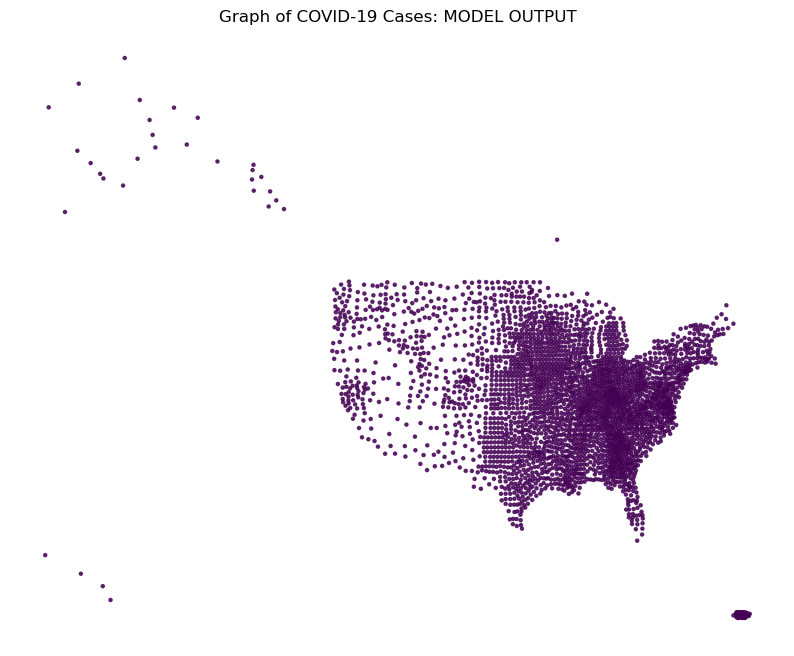

In [37]:
print(output) # last test output
print(target_graph_signal) # last test example

# plot the united states and have these values as the nodes

# get a list of the key values in train_graph_sig
geoid_list_tr = list(train_graph_sig.keys())
geoid_list_tar = list(target_graph_signal.keys())

# make a dictionary where key is geoid_list entry and value is out entry
out_dict = {geoid_list_tr[i]: output[i, 2].item() for i in range(len(output))}

target_dict = {i: target_graph_signal[i]['cumulative_confirmed'] for i in geoid_list_tar}

# need to get the geographical information on where to put these nodes
# get the geographical information from the preprocessor, 'geoid_o', 'lat_o', 'lng_o' for all the geoids in out_dict
print(graph_kronecker_whole_df)

# for each geoid_o which is a key in out_dict, get the lat_o and lng_o from the graph_kronecker_whole_df
# then plot the united states and put the values of out_dict as the node values (new_confirmed)
# then compare with the target_dict values

import networkx as nx
import matplotlib.pyplot as plt

# Create an empty graph
G = nx.Graph()

# Add nodes with attributes
geoid_o = list(out_dict.keys())
lat_o = [graph_kronecker_whole_df[graph_kronecker_whole_df['geoid_o'] == key]['lat_o'].values[0] for key in out_dict.keys()]
lng_o = [graph_kronecker_whole_df[graph_kronecker_whole_df['geoid_o'] == key]['lng_o'].values[0] for key in out_dict.keys()]


# cumulative_confirmed = [out_dict[key] for key in out_dict.keys()] # out_dict[key] will return a dictionary not a value

cumulative_confirmed = []
# pull column 3 from graph_signal_matrix as cumulative_confirmed
for i in range(graph_signal_matrix.shape[0]):
    cumulative_confirmed.append(graph_signal_matrix[i, 2])


for i in range(len(geoid_o)):
    G.add_node(geoid_o[i], cumulative_confirmed=cumulative_confirmed[i], lat=lat_o[i], lng=lng_o[i])

# Get node positions
pos = {node: (G.nodes[node]['lng'], G.nodes[node]['lat']) for node in G.nodes}

# Get node values
node_values = [G.nodes[node]['cumulative_confirmed'] for node in G.nodes]

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, pos, node_color=node_values, cmap='viridis', node_size=5, alpha=0.8, with_labels=False)
# plt.colorbar(label='New Confirmed Cases')
plt.title('Graph of COVID-19 Cases: MODEL OUTPUT')
plt.axis('off')
plt.show()



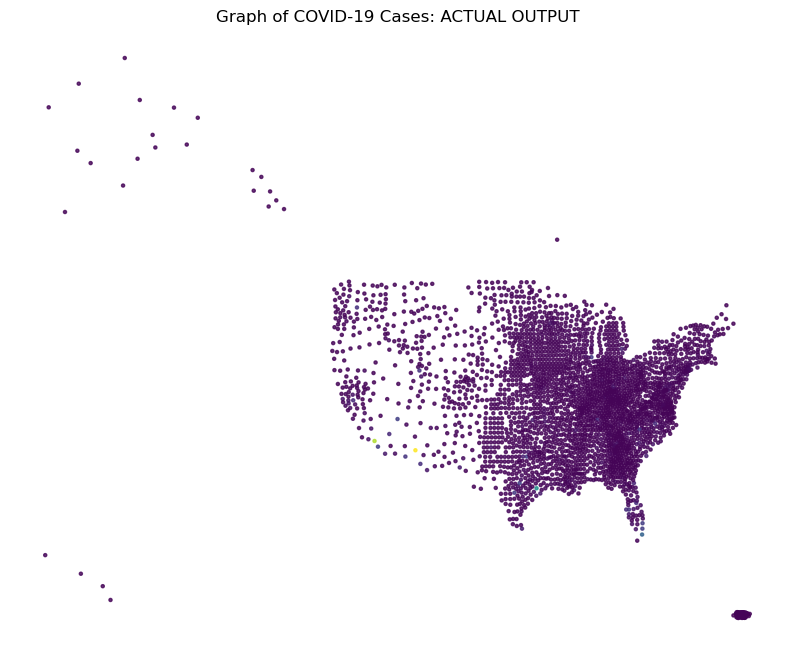

In [323]:
# Create an empty graph
H = nx.Graph()

# Add nodes with attributes
geoid_o = list(target_dict.keys())
lat_o = [graph_kronecker_whole_df[graph_kronecker_whole_df['geoid_o'] == key]['lat_o'].values[0] for key in target_dict.keys()]
lng_o = [graph_kronecker_whole_df[graph_kronecker_whole_df['geoid_o'] == key]['lng_o'].values[0] for key in target_dict.keys()]
new_confirmed = [target_dict[key] for key in target_dict.keys()]
for i in range(len(geoid_o)):
    H.add_node(geoid_o[i], new_confirmed=new_confirmed[i], lat=lat_o[i], lng=lng_o[i])

# Get node positions
pos = {node: (H.nodes[node]['lng'], H.nodes[node]['lat']) for node in H.nodes}

# Get node values
node_values = [H.nodes[node]['new_confirmed'] for node in H.nodes]

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx(H, pos, node_color=node_values, cmap='viridis', node_size=5, alpha=0.8, with_labels=False)
# plt.colorbar(label='New Confirmed Cases')
plt.title('Graph of COVID-19 Cases: ACTUAL OUTPUT')
plt.axis('off')
plt.show()